In [38]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Loading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [40]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown


In [42]:
#Checking the datatypes for the dataset we have to work on for making the ML model.
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Finding null values in train dataset

In [43]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [44]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# SEARCH FOR DUPLICATES

In [45]:
# search for duplicate values
train.duplicated().sum()

0

In [46]:
test.duplicated().sum()

0

# Understanding the data

In [47]:
# Basic Dataset Overview
print("Dataset Shape:", train.shape)
print("\nDataset Info:")
train.info()
print("\nSummary Statistics:\n", train.describe())

Dataset Shape: (40000, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB

Summary Statistics:
                 age        balance 

In [48]:
# Unique Values in Categorical Columns
categorical_columns = train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}: {train[col].unique()}")


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital: ['married' 'single' 'divorced']

Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default: ['no' 'yes']

Unique values in housing: ['yes' 'no']

Unique values in loan: ['no' 'yes']

Unique values in contact: ['unknown' 'cellular' 'telephone']

Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']

Unique values in poutcome: ['unknown' 'failure' 'other' 'success']

Unique values in y: ['no' 'yes']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19516\1721806710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=train, palette='Set2')


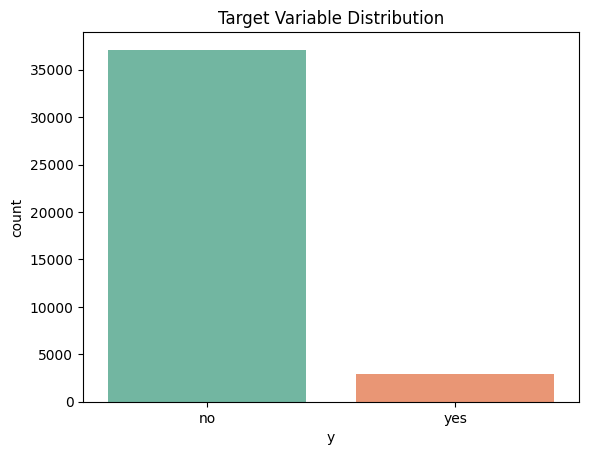

In [49]:
# Target Variable Distribution (y)
sns.countplot(x='y', data=train, palette='Set2')
plt.title('Target Variable Distribution')
plt.show()

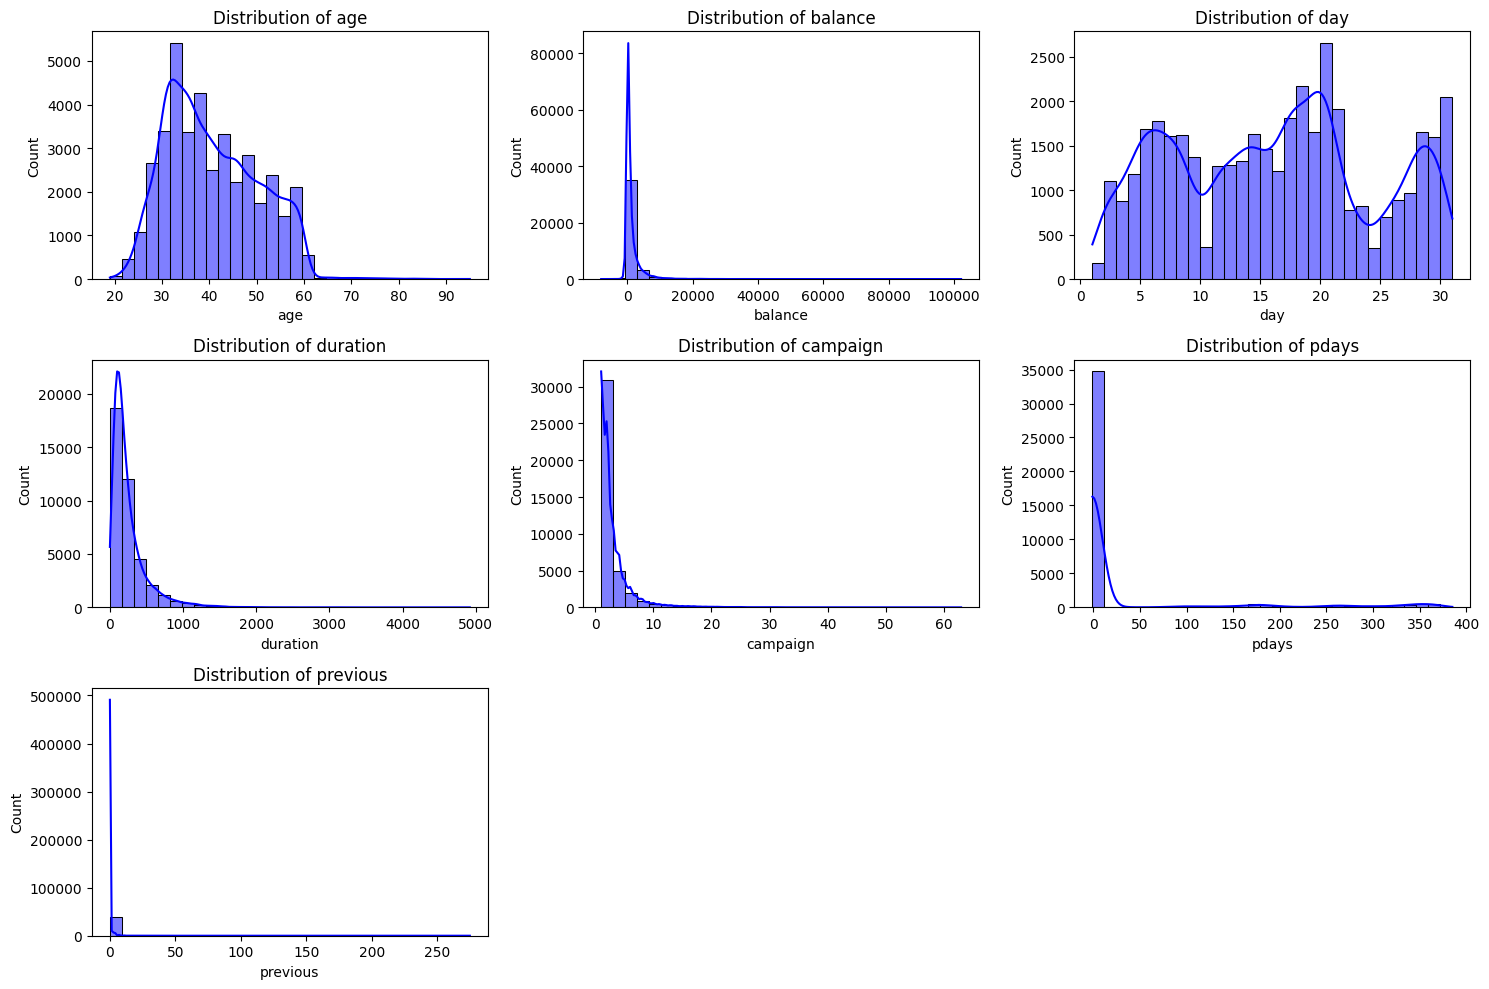

In [50]:
# Distribution of Numerical Columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

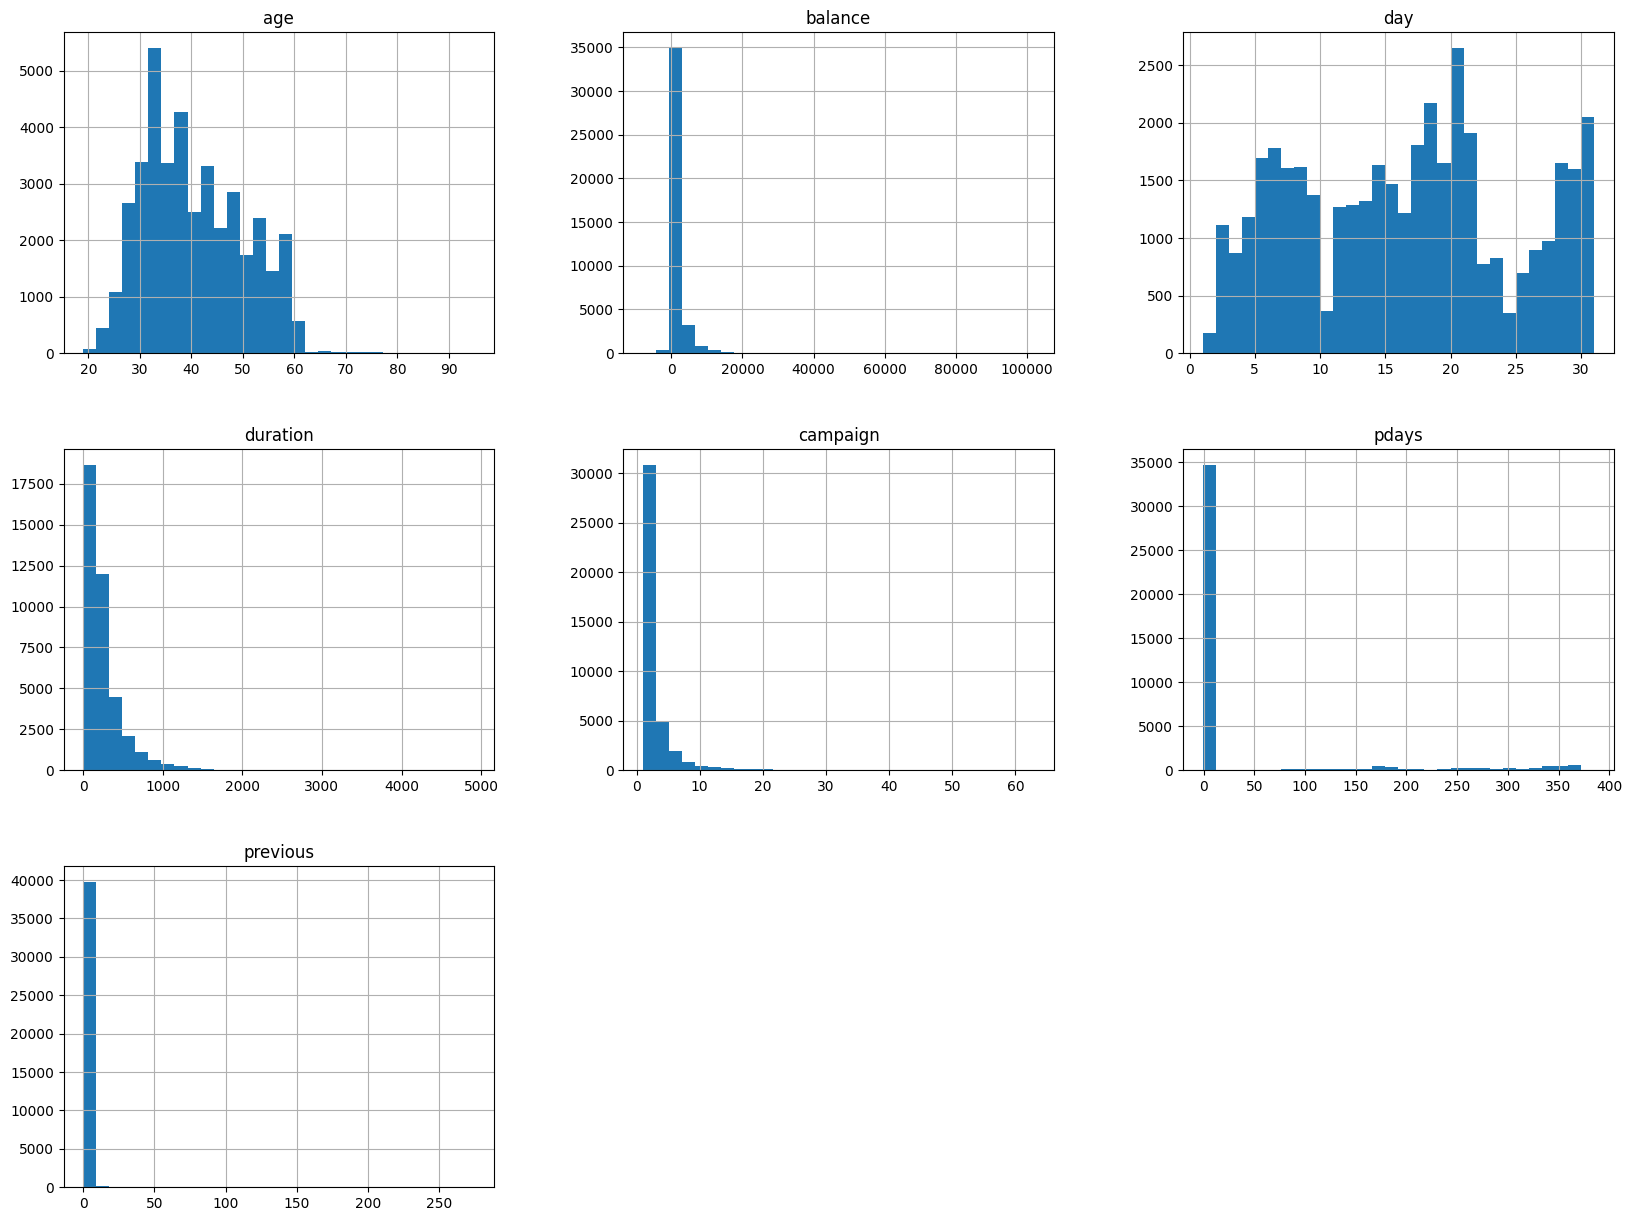

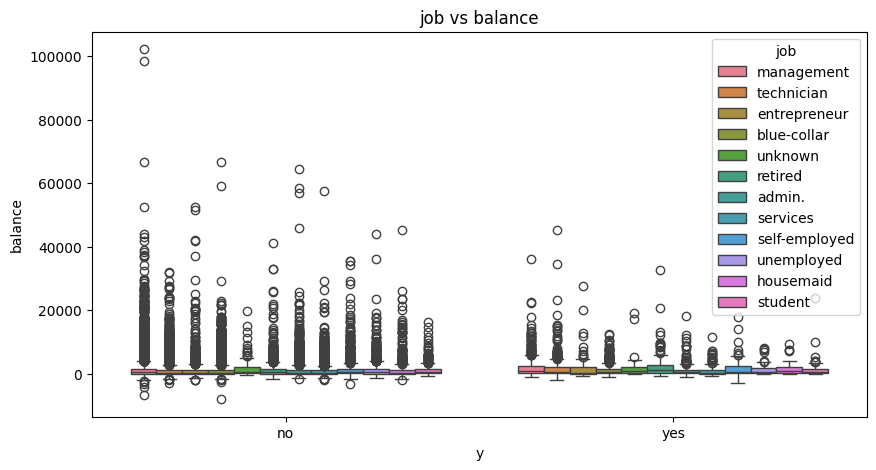

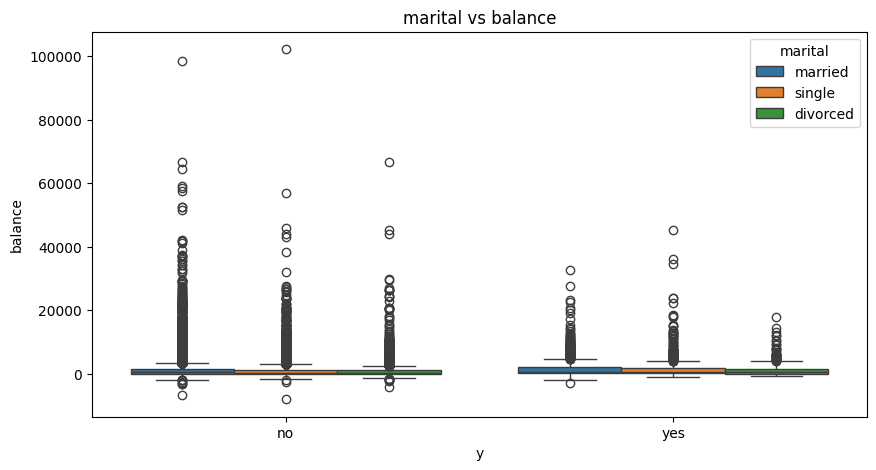

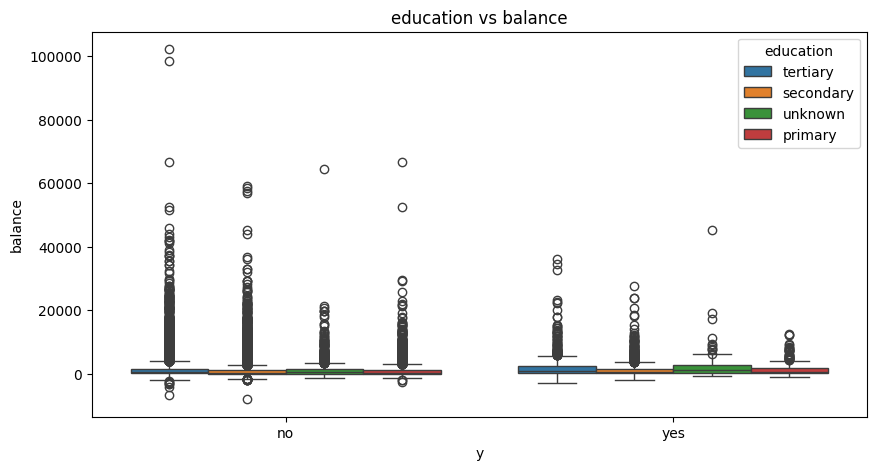

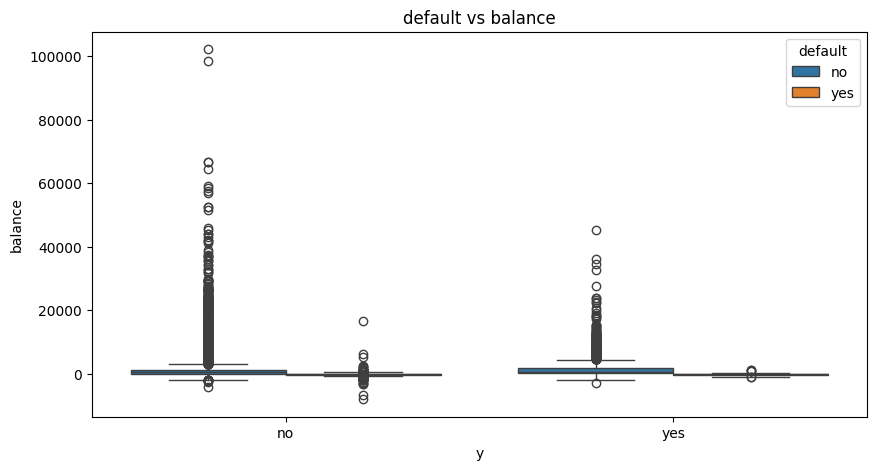

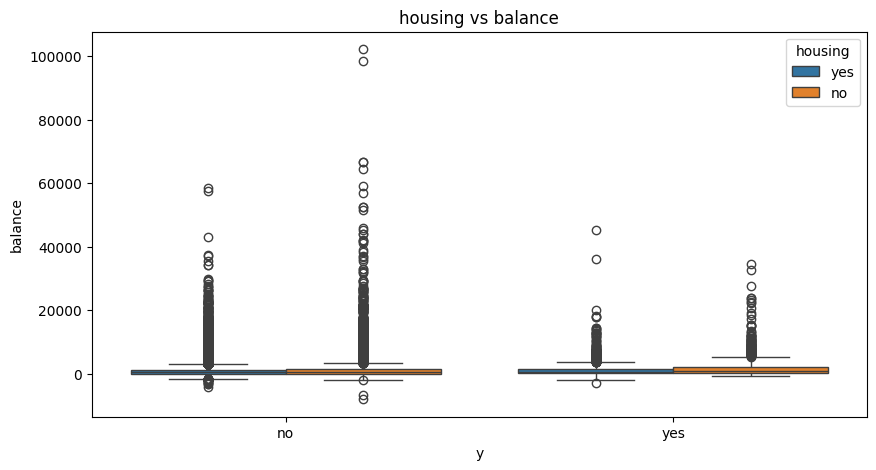

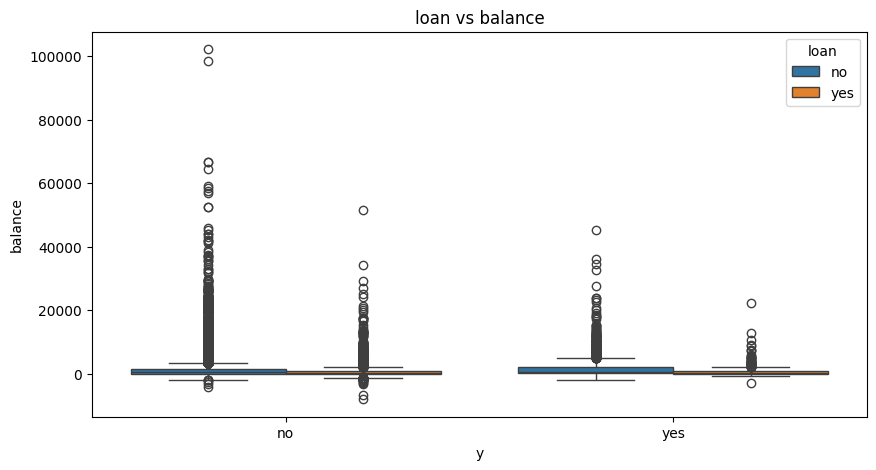

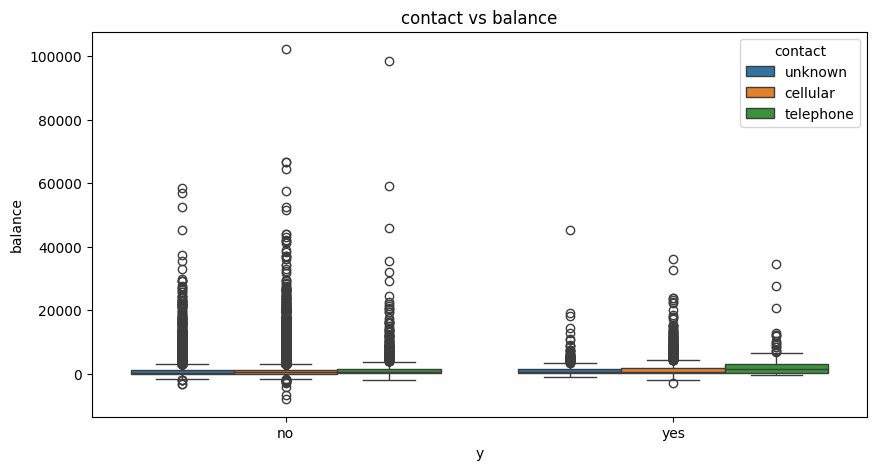

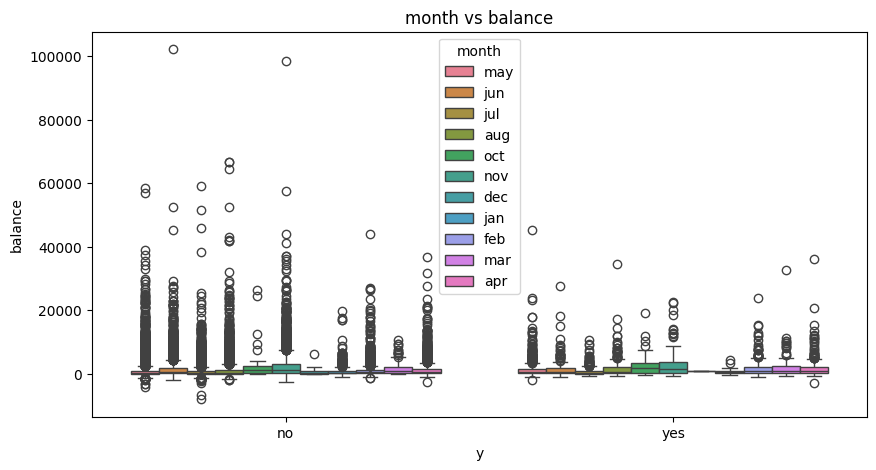

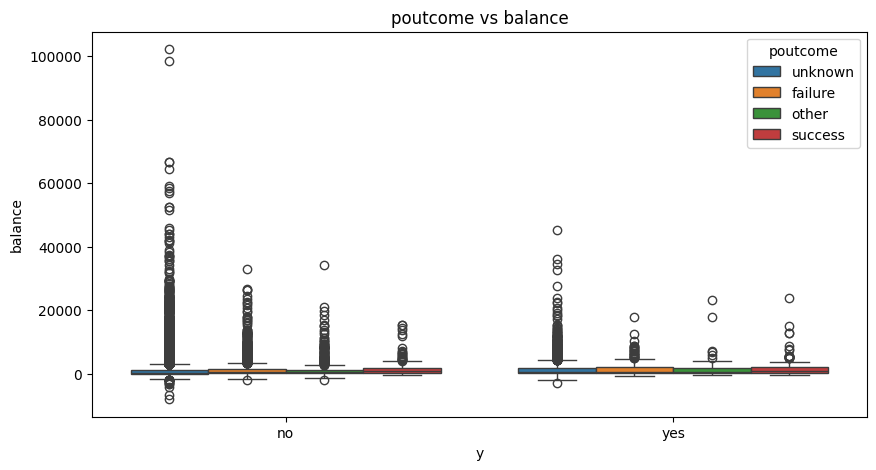

In [51]:
# Histograms
train.hist(bins=30, figsize=(20, 15))
plt.show()

# Box plots for categorical variables
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='y', y='balance', hue=column, data=train)
    plt.title(f'{column} vs balance')
    plt.show()
